In [1]:
pip install pydub

48000


<ipython-input-21-3133a893da51>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


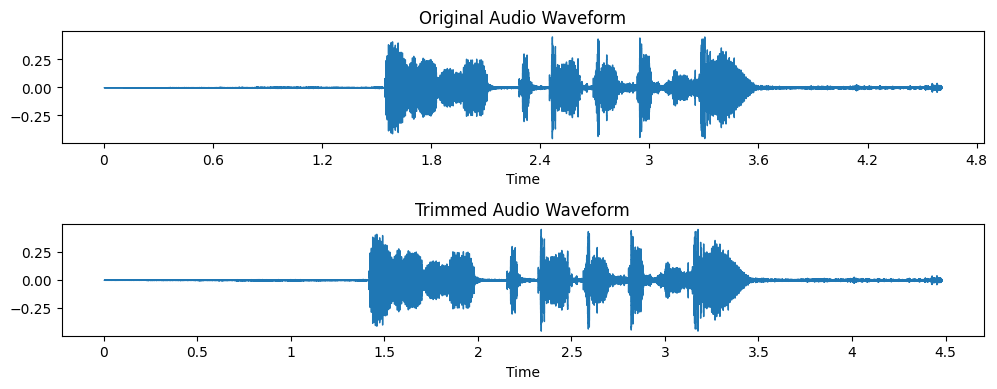

Playing original audio...
Playing trimmed audio...


In [21]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
filename = "/content/speech 5 word.mp4"
audio_sample = mediainfo(filename)
sample_rate = int(audio_sample['sample_rate'])
print(sample_rate)

y, sr = librosa.load(filename, sr=sample_rate)

# Trim the audio signal
trimmed_y, trim_indices = librosa.effects.trim(y)

# Plot the waveform of the original audio
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Waveform')

# Plot the waveform of the trimmed audio
plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_y, sr=sr)
plt.title('Trimmed Audio Waveform')

# Show the plots
plt.tight_layout()
plt.show()

# Play the original audio
print("Playing original audio...")
Audio(data=y, rate=sr)

# Play the trimmed audio
print("Playing trimmed audio...")
Audio(data=trimmed_y, rate=sr)

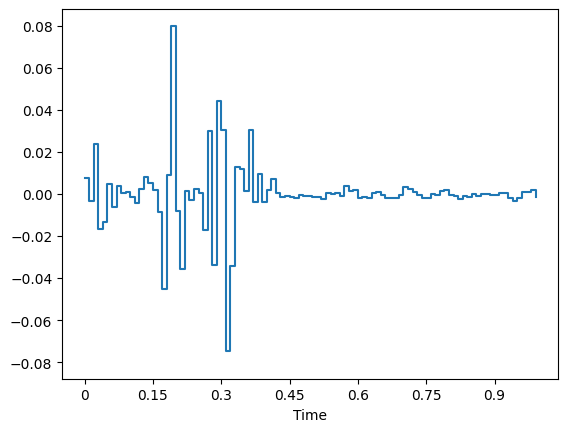

In [19]:
start_time = 3
end_time = 4
segment = y[int(start_time * sr):int(end_time * sr)]
librosa.display.waveshow(segment, sr=sr)

<ipython-input-24-6ab661e34932>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Number of splits with top_db=20: 6


<ipython-input-24-6ab661e34932>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(top_db_values) + 1, len(split_audio), (i+1)*(j+1)+1)


Number of splits with top_db=30: 7


Number of splits with top_db=40: 2


<ipython-input-24-6ab661e34932>:34: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


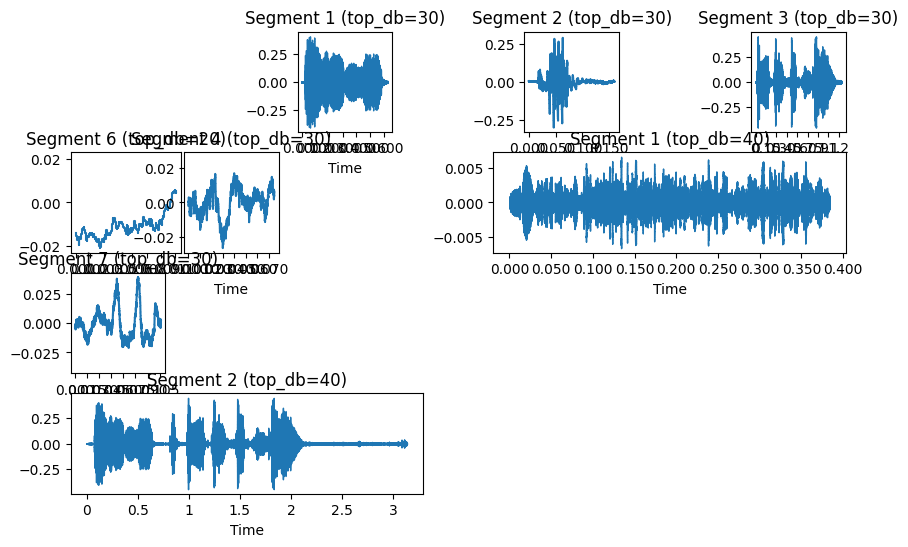

In [24]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

y, sr = librosa.load(filename, sr=sample_rate)

# Define different values for the top_db parameter
top_db_values = [20, 30, 40]

# Plot the original audio waveform
plt.figure(figsize=(10, 6))
plt.subplot(len(top_db_values) + 1, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Audio Waveform')

# Iterate over different top_db values
for i, top_db in enumerate(top_db_values):
    # Split the audio based on detected silences
    split_audio = librosa.effects.split(y, top_db=top_db)

    print(f"Number of splits with top_db={top_db}: {len(split_audio)}")

    # Plot each segment of the split audio
    for j, segment in enumerate(split_audio):
        plt.subplot(len(top_db_values) + 1, len(split_audio), (i+1)*(j+1)+1)
        segment_audio = y[segment[0]:segment[1]]
        librosa.display.waveshow(segment_audio, sr=sr)
        plt.title(f'Segment {j+1} (top_db={top_db})')

        # Play the segment
        display(Audio(data=segment_audio, rate=sr, autoplay=True))

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

48000


<ipython-input-2-8f29c8acc6ea>:14: UserWarning: PySoundFile failed. Trying audioread instead.
  original_signal, sr = librosa.load(filename, sr=100)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


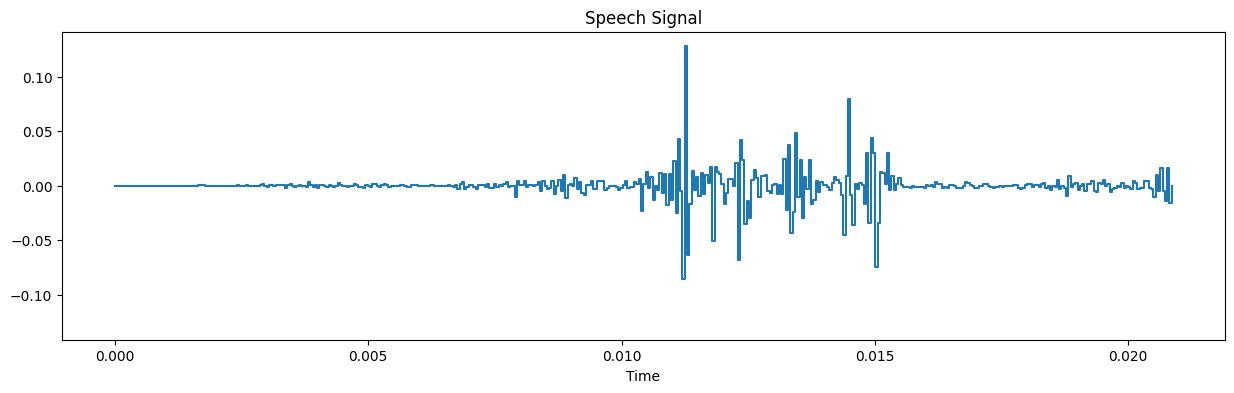

In [2]:
from pydub.utils import mediainfo
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display


# Example usage:
original_signal, sr = librosa.load(filename, sr=100)
plt.figure(figsize=(15, 4))
plt.title('Speech Signal')
librosa.display.waveshow(original_signal)

In [4]:
def silencing_signal(signal, Fe):
    N = int(Fe * 0.05)
    Ek = []
    for k in range(len(signal) - N + 1):
      sum = 0
      for x in signal[k : k + N - 1]:
        sum = sum + x**2
      Ek.append(sum/N)
    return Ek

sampling_frequency = 100
continuous_energy = silencing_signal(segment, sampling_frequency)
print("Continuous Average Energy:", continuous_energy)

Continuous Average Energy: [0.00018261008599558624, 0.0002074891523239468, 0.00020956082810611354, 0.00010405005335429774, 5.100000166814453e-05, 1.4625620892176746e-05, 1.0323378532446063e-05, 3.3929566848495376e-06, 3.855132444813747e-06, 5.161215940322395e-06, 1.8754109375163867e-05, 2.3507432336224892e-05, 2.100881593326819e-05, 3.384981247474274e-05, 0.0004322662626612961, 0.0004430628394176017, 0.0017174477503056472, 0.0017163823363963015, 0.0015607909303187002, 0.0015452112168683485, 0.00027190346780559086, 0.00025974475832947356, 3.2477136827761517e-06, 6.12871089832711e-05, 0.00023709817946987514, 0.00046640748275998537, 0.0008541500597354076, 0.000981088129164929, 0.0019169571177785534, 0.001920454604241373, 0.0015659619560531592, 0.001409200559963728, 0.0002960389198960141, 0.0002455168988359992, 0.00021544482571081463, 0.00020423437200438901, 0.0002067085059990674, 2.403596878623656e-05, 3.080854303307256e-05, 1.3467553914809708e-05, 1.0955245716894266e-05, 1.05601737125459

In [5]:
Em = []
some = 0
for k in range(len(continuous_energy)):
  some = (continuous_energy[k] - np.mean(continuous_energy))/np.var(continuous_energy)
  Em.append(some)


print(Em)

[-96.99206916630466, 14.475434603911946, 23.757315403276944, -448.97033953446817, -686.654373102706, -849.6251764588811, -868.900828130222, -899.9517049288235, -897.8809850076508, -892.0292434254569, -831.1280070125312, -809.8313458721916, -821.026080016994, -763.4936223472101, 1021.5607915582191, 1069.9334854690453, 6779.653576419144, 6774.880124417793, 6077.772547522997, 6007.969615819475, 303.07561191929693, 248.60005497988251, -900.6024477930264, -640.5642924582265, 147.13492839122168, 1174.5262015073963, 2911.757679185983, 3480.4876124548086, 7673.530013640136, 7689.200058501756, 6100.940673004244, 5398.591104133804, 411.21144633436677, 184.8539336102438, 50.119820994506014, -0.10719614087457983, 10.977847676282535, -807.4633052891247, -777.1196446617682, -854.8137487896149, -866.0698272865744, -867.8398973347416, -910.422054416548, -907.6548817740257, -909.2784412102673, -909.1792065595571, -910.4828589282828, -911.4141895426789, -909.9440996101146, -905.2248444448713, -905.98305

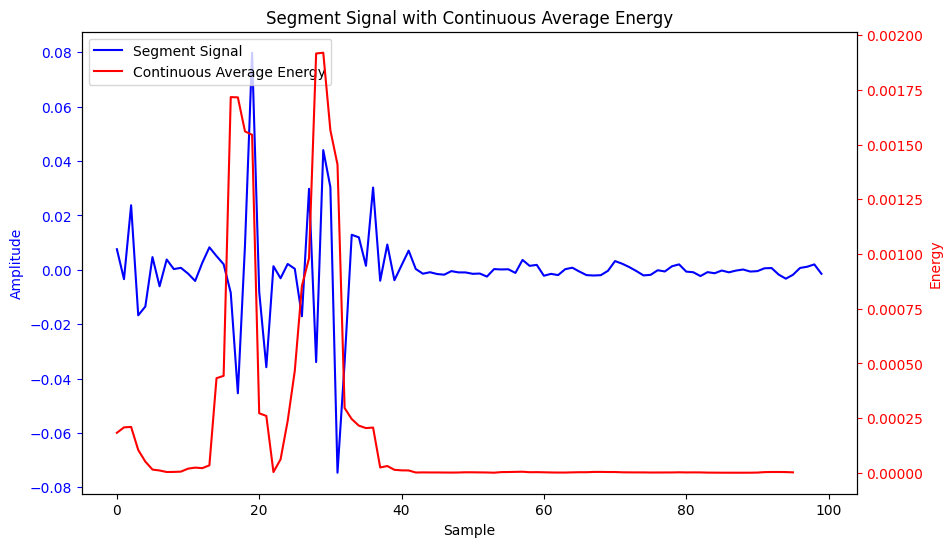

In [ ]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the segment signal on the first y-axis
line1, = ax1.plot(segment, color='b', label='Segment Signal')
ax1.set_xlabel('Sample')
ax1.set_ylabel('Amplitude', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the Continuous Average Energy plot
ax2 = ax1.twinx()
line2, = ax2.plot(np.arange(len(continuous_energy)), continuous_energy, color='r', label='Continuous Average Energy')
ax2.set_ylabel('Energy', color='r')
ax2.tick_params('y', colors='r')

# Combine legends for both lines
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Segment Signal with Continuous Average Energy')

plt.show()

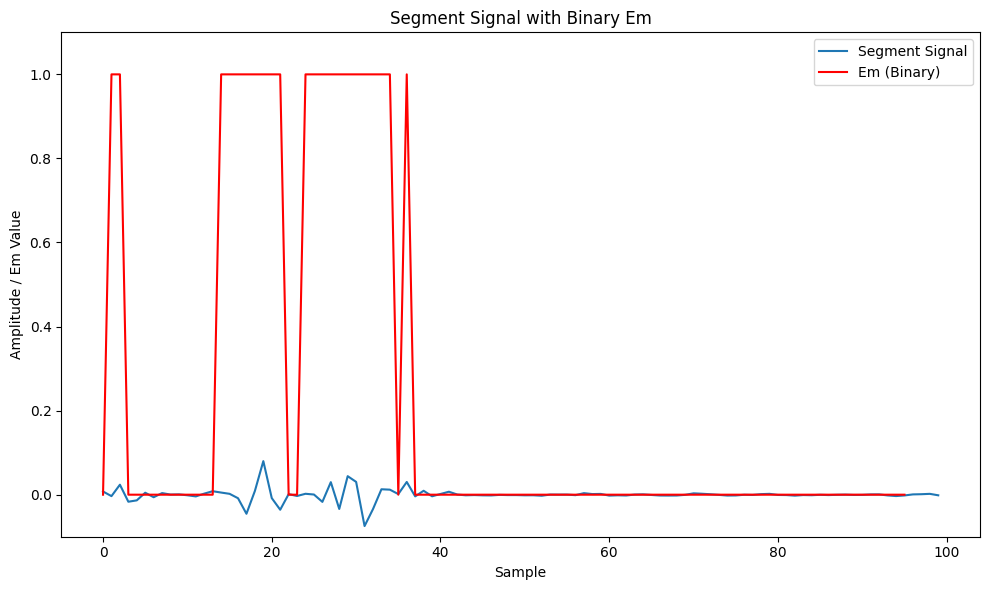

In [9]:
Em_binary = []
for val in Em:
    if val > 0:
        Em_binary.append(1)
    else:
        Em_binary.append(0)


plt.figure(figsize=(10, 6))

plt.plot(segment, label='Segment Signal')

plt.plot(range(len(Em_binary)), Em_binary, color='r', label='Em (Binary)')
plt.ylim([-0.1, 1.1])

plt.title('Segment Signal with Binary Em')
plt.xlabel('Sample')
plt.ylabel('Amplitude / Em Value')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
Ek = sum(x for x in range(0, 10)) / 9
print(Ek)

5.0


In [ ]:
Ek = 0
for x in range(0,10):
  Ek = (Ek + x)
print(Ek/9)

5.0
